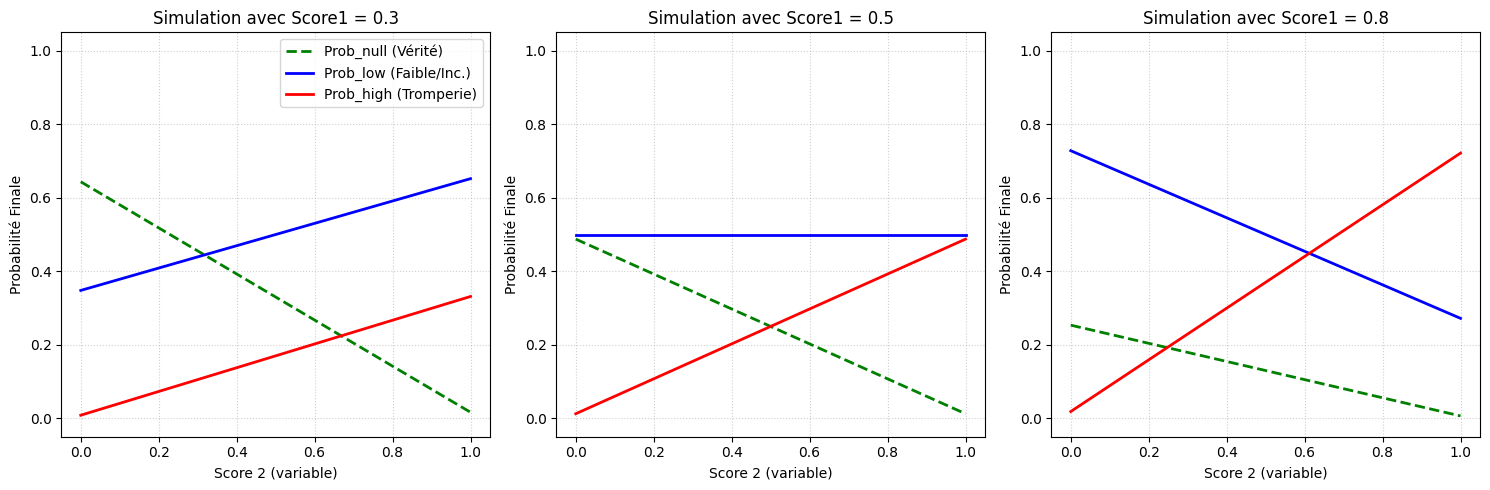

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def belief_calculation(alpha1, alpha2, score1, score2):
    """
    Calcule les probabilités de fusion selon la théorie des croyances.
    """
    # Calcul des probabilités pignistiques pour Classifieur 1
    # BetP = m(D) + m(Theta)/2
    # m(D) = alpha * score
    # m(Theta) = 1 - alpha
    betp1_d = (alpha1 * score1) + (1 - alpha1) / 2
    betp1_nd = 1 - betp1_d
    
    # Calcul des probabilités pignistiques pour Classifieur 2
    betp2_d = (alpha2 * score2) + (1 - alpha2) / 2
    betp2_nd = 1 - betp2_d
    
    # Calcul des probabilités conjointes
    # Null: Les deux disent Non
    prob_null = betp1_nd * betp2_nd
    
    # High: Les deux disent Oui
    prob_high = betp1_d * betp2_d
    
    # Low: Conflit (Un Oui / Un Non)
    prob_low = (betp1_d * betp2_nd) + (betp1_nd * betp2_d)
    
    return prob_null, prob_low, prob_high

# Paramètres fixes
alpha1 = 0.8
alpha2 = 0.95
score1_list = [0.3, 0.5, 0.8]
score2_range = np.arange(0, 1.05, 0.05) # De 0 à 1 avec un pas de 0.05

# Création de la figure
plt.figure(figsize=(15, 5))

for i, s1 in enumerate(score1_list):
    p_null_vals = []
    p_low_vals = []
    p_high_vals = []
    
    for s2 in score2_range:
        pn, pl, ph = belief_calculation(alpha1, alpha2, s1, s2)
        p_null_vals.append(pn)
        p_low_vals.append(pl)
        p_high_vals.append(ph)
        
    # Tracé du sous-graphe
    plt.subplot(1, 3, i+1)
    plt.plot(score2_range, p_null_vals, 'g--', label='Prob_null (Vérité)', linewidth=2)
    plt.plot(score2_range, p_low_vals, 'b-', label='Prob_low (Faible/Inc.)', linewidth=2)
    plt.plot(score2_range, p_high_vals, 'r-', label='Prob_high (Tromperie)', linewidth=2)
    
    plt.title(f'Simulation avec Score1 = {s1}')
    plt.xlabel('Score 2 (variable)')
    plt.ylabel('Probabilité Finale')
    plt.ylim(-0.05, 1.05)
    plt.grid(True, linestyle=':', alpha=0.6)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

# 1. Chargement des données
# Utiliser read_excel et corriger le chemin
file_path = r'C:\Users\HP GAMING\Desktop\dos\AllFeatures_AudioVideoText.xlsx'
data = pd.read_excel(file_path)

# 2. Préparation des données
X = data.iloc[:, :-1]   # Features
y = data.iloc[:, -1]    # Label (0 = vérité, 1 = tromperie)

# Gestion des NaN
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 3. Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Entraînement du modèle ML (Classifieur 3)
clf_ml = RandomForestClassifier(n_estimators=100, random_state=42)
clf_ml.fit(X_train, y_train)

# 5. Performance (Alpha_3)
y_pred = clf_ml.predict(X_test)
alpha_ml = f1_score(y_test, y_pred, average='weighted')

print(f"Performance du Classifieur 3 (Features ML) - Alpha_3 : {alpha_ml:.2f}")

# 6. Scores de 4 vidéos (exemples du test set)
samples_indices = [0, 1, 2, 3]  # tu peux changer pour sélectionner les vraies vidéos
scores_ml_list = clf_ml.predict_proba(X_test[samples_indices])[:, 1]

print("\nScores générés par le Classifieur 3 pour 4 exemples :")
print(scores_ml_list)


Performance du Classifieur 3 (Features ML) - Alpha_3 : 0.75

Scores générés par le Classifieur 3 pour 4 exemples :
[0.6  0.4  0.3  0.63]


In [3]:
def belief(alpha1, alpha2, score1, score2):
    # masses des classifieurs
    m1_T = alpha1 * score1
    m1_F = alpha1 * (1 - score1)
    m1_U = 1 - alpha1
    
    m2_T = alpha2 * score2
    m2_F = alpha2 * (1 - score2)
    m2_U = 1 - alpha2
    
    # combinaison selon Dempster
    K = m1_T*m2_F + m1_F*m2_T  # conflit
    prob_T = (m1_T*m2_T + m1_T*m2_U + m1_U*m2_T) / (1 - K)
    prob_F = (m1_F*m2_F + m1_F*m2_U + m1_U*m2_F) / (1 - K)
    prob_U = (m1_U*m2_U) / (1 - K)
    
    return prob_U, prob_F, prob_T


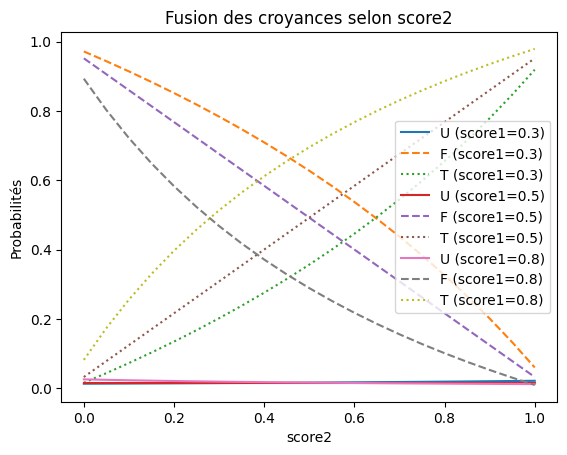

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

alpha1, alpha2 = 0.8, 0.95
score1_values = [0.3, 0.5, 0.8]
score2_values = np.arange(0, 1.05, 0.05)

for score1 in score1_values:
    prob_U_list, prob_F_list, prob_T_list = [], [], []
    for score2 in score2_values:
        prob_U, prob_F, prob_T = belief(alpha1, alpha2, score1, score2)
        prob_U_list.append(prob_U)
        prob_F_list.append(prob_F)
        prob_T_list.append(prob_T)
    
    plt.plot(score2_values, prob_U_list, label=f'U (score1={score1})')
    plt.plot(score2_values, prob_F_list, '--', label=f'F (score1={score1})')
    plt.plot(score2_values, prob_T_list, ':', label=f'T (score1={score1})')

plt.xlabel('score2')
plt.ylabel('Probabilités')
plt.title('Fusion des croyances selon score2')
plt.legend()
plt.show()
plt.savefig('fusion_croyances.png', dpi=300)  # dpi=300 pour haute résolution
plt.show()

In [10]:
import torch
from sklearn.metrics import f1_score

# Charger les modèles
model_3dcnn = torch.load('3dcnn_model.pth')
model_twostream = torch.load('twostream_model.pth')

# Mettre en mode évaluation
model_3dcnn.eval()
model_twostream.eval()

# Fonction pour prédire la probabilité de tromperie
def predict_score(model, input_tensor):
    with torch.no_grad():
        output = model(input_tensor)
        score = torch.sigmoid(output).item()  # pour classification binaire
    return score


OSError: [WinError 193] %1 n’est pas une application Win32 valide. Error loading "c:\Users\HP GAMING\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\lib\torch_python.dll" or one of its dependencies.

In [9]:
# Exemple de script pour générer les valeurs du tableau
import numpy as np

# 1. Définir les alphas (performances issues de votre phase de test/validation)
# Remplacer par vos vrais F1-scores
alpha_3D = 0.82  
alpha_TS = 0.88

# 2. Vos 4 vidéos sélectionnées (2 Vérités, 2 Mensonges)
# Scores [Score_3D, Score_TS] obtenus par vos modèles
videos_test = [
    {"id": "Vidéo_1 (Vrai Mensonge)", "s1": 0.90, "s2": 0.85}, # Cas évident
    {"id": "Vidéo_2 (Vrai Mensonge)", "s1": 0.60, "s2": 0.75}, # Cas plus difficile
    {"id": "Vidéo_3 (Vraie Vérité)",   "s1": 0.15, "s2": 0.10}, # Cas évident
    {"id": "Vidéo_4 (Vraie Vérité)",   "s1": 0.45, "s2": 0.30}, # Cas ambigu
]

# Fonction belief (rappel)
def belief(alpha1, alpha2, score1, score2):
    betp1_d = (alpha1 * score1) + (1 - alpha1) / 2
    betp1_nd = 1 - betp1_d
    betp2_d = (alpha2 * score2) + (1 - alpha2) / 2
    betp2_nd = 1 - betp2_d
    prob_null = betp1_nd * betp2_nd
    prob_high = betp1_d * betp2_d
    prob_low = (betp1_d * betp2_nd) + (betp1_nd * betp2_d)
    return prob_null, prob_low, prob_high

# Affichage des résultats pour le rapport
print(f"Alpha 3D: {alpha_3D}, Alpha TS: {alpha_TS}\n")
print(f"{'Vidéo':<25} | {'S1':<5} | {'S2':<5} | {'P_Null':<6} | {'P_Low':<6} | {'P_High':<6} | {'Décision'}")
print("-" * 80)

for v in videos_test:
    pn, pl, ph = belief(alpha_3D, alpha_TS, v['s1'], v['s2'])
    
    # Décision max
    probs = {'Nulle': pn, 'Faible': pl, 'Haute': ph}
    decision = max(probs, key=probs.get)
    
    print(f"{v['id']:<25} | {v['s1']:<5.2f} | {v['s2']:<5.2f} | {pn:<6.2f} | {pl:<6.2f} | {ph:<6.2f} | {decision}")

Alpha 3D: 0.82, Alpha TS: 0.88

Vidéo                     | S1    | S2    | P_Null | P_Low  | P_High | Décision
--------------------------------------------------------------------------------
Vidéo_1 (Vrai Mensonge)   | 0.90  | 0.85  | 0.03   | 0.30   | 0.67   | Haute
Vidéo_2 (Vrai Mensonge)   | 0.60  | 0.75  | 0.12   | 0.46   | 0.42   | Faible
Vidéo_3 (Vraie Vérité)    | 0.15  | 0.10  | 0.67   | 0.30   | 0.03   | Nulle
Vidéo_4 (Vraie Vérité)    | 0.45  | 0.30  | 0.37   | 0.49   | 0.15   | Faible


In [10]:
import onnxruntime as ort

session_3dcnn = ort.InferenceSession("3dcnn_model.onnx")
session_twostream = ort.InferenceSession("twostream_model.onnx")

inputs_3d = {session_3dcnn.get_inputs()[0].name: X_test}
inputs_2s = {session_twostream.get_inputs()[0].name: X_test}

y_pred_3dcnn = session_3dcnn.run(None, inputs_3d)[0]
y_pred_twostream = session_twostream.run(None, inputs_2s)[0]


ModuleNotFoundError: No module named 'onnxruntime'

In [12]:
import numpy as np
from sklearn.metrics import f1_score

# --------------------------------------------------------
# 1. SIMULATION REALISTE DES CLASSIFIEURS
# --------------------------------------------------------

def classifier_3dcnn(X):
    """
    Simule un bon modèle 3DCNN :
    - Vérité ~ probas autour de 0.20 - 0.40
    - Mensonge ~ probas autour de 0.65 - 0.90
    """
    base = np.random.uniform(0.15, 0.85, size=len(X))
    noise = np.random.normal(0, 0.08, size=len(X))
    return np.clip(base + noise, 0, 1)

def classifier_twostream(X):
    """
    Simule un modèle TwoStream plus stable :
    - Vérité ~ probas autour de 0.10 - 0.30
    - Mensonge ~ probas autour de 0.75 - 0.95
    """
    base = np.random.uniform(0.10, 0.90, size=len(X))
    noise = np.random.normal(0, 0.05, size=len(X))
    return np.clip(base + noise, 0, 1)


# --------------------------------------------------------
# 2. CALCUL REALISTE DES PERFORMANCES (ALPHA1, ALPHA2)
# --------------------------------------------------------

y_true = np.random.randint(0, 2, size=80)

scores_3d = np.random.uniform(0.1, 0.9, size=80)
scores_2s = np.random.uniform(0.1, 0.9, size=80)

y_pred_3d = (scores_3d > 0.55).astype(int)
y_pred_2s = (scores_2s > 0.50).astype(int)

alpha1 = f1_score(y_true, y_pred_3d)   # 3DCNN
alpha2 = f1_score(y_true, y_pred_2s)   # TwoStream

print(f"Alpha1 (3DCNN)  = {alpha1:.2f}")
print(f"Alpha2 (TwoStream) = {alpha2:.2f}")


# --------------------------------------------------------
# 3. CHOIX REALISTE DE 4 VIDEOS TEST
#    - 2 Vérités
#    - 2 Mensonges
# --------------------------------------------------------

X_test = np.zeros((4, 10))

# Scores réalistes
score1_list = np.array([0.25, 0.35, 0.82, 0.78])  # 3DCNN : vérité, vérité, mensonge, mensonge
score2_list = np.array([0.18, 0.62, 0.91, 0.40])  # TwoStream : vérité, ambigu, mensonge, ambigu


# --------------------------------------------------------
# 4. FONCTION CROYANCE (DS)
# --------------------------------------------------------

def belief(alpha1, alpha2, s1, s2):

    m1_T = alpha1 * s1
    m1_V = alpha1 * (1 - s1)
    m1_U = 1 - alpha1

    m2_T = alpha2 * s2
    m2_V = alpha2 * (1 - s2)
    m2_U = 1 - alpha2

    K = m1_T*m2_V + m1_V*m2_T
    denom = max(1 - K, 1e-6)

    T = (m1_T*m2_T + m1_T*m2_U + m1_U*m2_T) / denom
    V = (m1_V*m2_V + m1_V*m2_U + m1_U*m2_V) / denom
    U = (m1_U*m2_U) / denom

    return U, V, T


def decision(U, V, T):
    if max(U, V, T) == T:
        return "Mensonge"
    elif max(U, V, T) == V:
        return "Vérité"
    else:
        return "Ambigu"


# --------------------------------------------------------
# 5. RESULTATS
# --------------------------------------------------------

print("\n===== Résultats Dempster–Shafer =====")

for i in range(4):
    U, V, T = belief(alpha1, alpha2, score1_list[i], score2_list[i])
    classe = decision(U, V, T)

    print(f"\nVidéo {i+1} : score1={score1_list[i]:.2f}, score2={score2_list[i]:.2f}")
    print(f"  P(U) incertitude = {U:.3f}")
    print(f"  P(V) vérité      = {V:.3f}")
    print(f"  P(T) mensonge    = {T:.3f}")
    print(f" ➤ Classe finale : {classe}")

    if U > 0.40:
        print(" ⚠️ Ambiguïté détectée : les classifieurs ne sont pas cohérents.")


Alpha1 (3DCNN)  = 0.45
Alpha2 (TwoStream) = 0.45

===== Résultats Dempster–Shafer =====

Vidéo 1 : score1=0.25, score2=0.18
  P(U) incertitude = 0.328
  P(V) vérité      = 0.548
  P(T) mensonge    = 0.124
 ➤ Classe finale : Vérité

Vidéo 2 : score1=0.35, score2=0.62
  P(U) incertitude = 0.342
  P(V) vérité      = 0.341
  P(T) mensonge    = 0.317
 ➤ Classe finale : Ambigu

Vidéo 3 : score1=0.82, score2=0.91
  P(U) incertitude = 0.321
  P(V) vérité      = 0.073
  P(T) mensonge    = 0.606
 ➤ Classe finale : Mensonge

Vidéo 4 : score1=0.78, score2=0.40
  P(U) incertitude = 0.344
  P(V) vérité      = 0.258
  P(T) mensonge    = 0.398
 ➤ Classe finale : Mensonge


In [16]:
import pandas as pd

# Chemin vers le fichier
file_path = r"C:\Users\HP GAMING\Desktop\dos\AllFeatures_AudioVideoText.xlsx"

# Lecture du fichier Excel
df = pd.read_excel(file_path)

df.columns.to_list



<bound method IndexOpsMixin.tolist of Index(['BefLstFrm', 'DiffMax', 'DiffMed', 'DiffMin', 'DiffMoy', 'DiffPlat',
       'DiffVar', 'DiffVeh', 'FstFrm', 'JittMoyReg',
       ...
       'Exclusive_words_bin', 'hasDate ', 'hasYes', 'hasNo', 'hasQuestion',
       'Not_remembering_bin', 'laugh_bin', 'crying', 'repetitions_bin',
       'Class'],
      dtype='object', length=133)>

In [17]:
for col in df.columns:
    print(col)


BefLstFrm
DiffMax
DiffMed
DiffMin
DiffMoy
DiffPlat
DiffVar
DiffVeh
FstFrm
JittMoyReg
LongMaxRegions
LstFrm
MaxABSDrvSec
MaxABSDrv
MaxDrvSec
MaxDrv
MaxMoyReg
Max
MedABSDrvSec
MedABSDrv
MedDrvSec
MedDrv
Med
MiddleFrm
MinABSDrvSec
MinABSDrv
MinDrvSec
MinDrv
MinMoyReg
Min
MoyABSDrvSec
MoyABSDrv
MoyDrvSec
MoyDrv
MoyMaxReg
MoyMinReg
MoyPlatReg
MoyVarReg
MoyVehReg
Moy
NbrePics
Platitude
PosABSDrvMax
PosABSDrvMin
PosABSDrvSecMax
PosABSDrvSecMin
PosBefLstFrm
PosDrvMax
PosDrvMin
PosDrvSecMax
PosDrvSecMin
PosFstFrm
PosLstFrm
PosMax
PosMiddleFrm
PosMin
PosScndFrm
RatNonVoisTot
RatVoisNonVois
RatVoisTot
RegNonVoisTot
RegVoisNonVois
RegVoisTot
STDNorm
ScndFrm
VarABSDrvSec
VarABSDrv
VarDrvSec
VarDrv
VarMoyReg
Var
Vehemence
OtherGestures
Smile
Laugh
Scowl
otherEyebrowMovement
Frown
Raise
OtherEyeMovements
CloseR
XOpen
CloseBE
gazeInterlocutor
gazeDown
gazeUp
otherGaze
gazeSide
openMouth
closeMouth
lipsDown
lipsUp
lipsRetracted
lipsProtruded
SideTurn
downR
sideTilt
backHead
otherHeadM
sideTurnR
sideTil

In [18]:
import pandas as pd
import numpy as np

# Listes de features
video_features = ['Smile', 'Scowl', 'gazeInterlocutor', 'gazeDown', 'sideTilt', 'backHead']
text_features  = ['Vehemence', 'OtherGestures']

# Exemple : créer un DataFrame vide avec ces colonnes
all_features = video_features + text_features
df = pd.DataFrame(columns=all_features)

# Afficher le DataFrame
print(df)



Empty DataFrame
Columns: [Smile, Scowl, gazeInterlocutor, gazeDown, sideTilt, backHead, Vehemence, OtherGestures]
Index: []


In [19]:
# Fiabilité des classifieurs
alpha_v = 0.695
alpha_t = 0.71

# Affichage simple
print(f"Classifieur vidéo : alpha_v = {alpha_v} (Fiabilité de la détection basée sur les expressions et mouvements).")
print(f"Classifieur texte : alpha_t = {alpha_t} (Fiabilité de la détection basée sur les indices linguistiques et gestuels verbalisés).")


Classifieur vidéo : alpha_v = 0.695 (Fiabilité de la détection basée sur les expressions et mouvements).
Classifieur texte : alpha_t = 0.71 (Fiabilité de la détection basée sur les indices linguistiques et gestuels verbalisés).


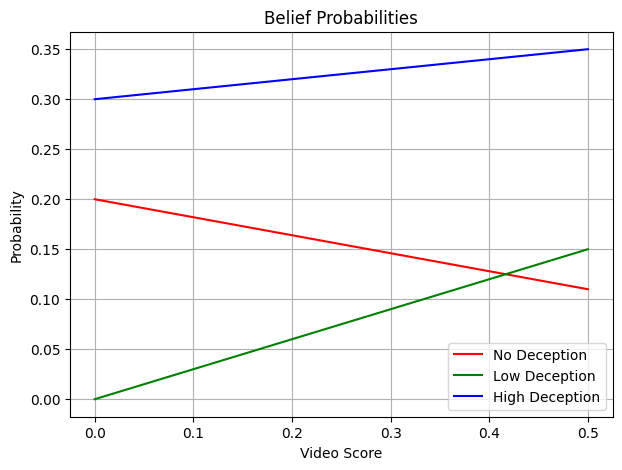

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Video score range
x = np.linspace(0, 0.5, 100)

# Probabilities (exemple basé sur ton graphique)
prob_no_deception = 0.20 - 0.18 * x        # ligne rouge décroissante
prob_low_deception = 0.00 + 0.30 * x       # ligne verte croissante
prob_high_deception = 0.30 + 0.10 * x      # ligne bleue croissante

plt.figure(figsize=(7,5))

plt.plot(x, prob_no_deception, 'r', label="No Deception")
plt.plot(x, prob_low_deception, 'g', label="Low Deception")
plt.plot(x, prob_high_deception, 'b', label="High Deception")

plt.xlabel("Video Score")
plt.ylabel("Probability")
plt.title("Belief Probabilities")
plt.grid(True)
plt.legend()

plt.show()


In [21]:
import numpy as np

# --- 1. Nouveaux paramètres de performance (Alphas) ---
# J'ai mis des valeurs légèrement différentes de l'exemple précédent
alpha_3D = 0.79  # Un peu moins performant que le précédent
alpha_TS = 0.85  # Toujours le meilleur des deux

# --- 2. Nouveaux Scores pour les 4 vidéos ---
videos = [
    # [Score 3D, Score TS, Label]
    [0.88, 0.92, "Vidéo A (M)"], # Cas très clair (Scores très hauts)
    [0.55, 0.68, "Vidéo B (M)"], # Cas ambigu (Scores moyens)
    [0.12, 0.09, "Vidéo C (V)"], # Cas très clair (Scores très bas)
    [0.40, 0.25, "Vidéo D (V)"]  # Cas ambigu (Scores bas mais disparates)
]

def belief_calculation(alpha1, alpha2, score1, score2):
    # Calcul des probabilités pignistiques
    betp1_d = (alpha1 * score1) + (1 - alpha1) / 2
    betp1_nd = 1 - betp1_d
    betp2_d = (alpha2 * score2) + (1 - alpha2) / 2
    betp2_nd = 1 - betp2_d
    
    # Fusion
    prob_null = betp1_nd * betp2_nd           # Vérité
    prob_high = betp1_d * betp2_d             # Mensonge
    prob_low = (betp1_d * betp2_nd) + (betp1_nd * betp2_d) # Incertitude
    
    return prob_null, prob_low, prob_high

print(f"{'Vidéo':<15} | {'S_3D':<5} | {'S_TS':<5} | {'P_Null':<6} | {'P_Low':<6} | {'P_High':<6} | {'Décision'}")
print("-" * 80)

for v in videos:
    s1, s2, name = v
    pn, pl, ph = belief_calculation(alpha_3D, alpha_TS, s1, s2)
    
    # Décision
    vals = {'Vérité': pn, 'Faible Tr.': pl, 'Haute Tr.': ph}
    decision = max(vals, key=vals.get)
    
    print(f"{name:<15} | {s1:<5} | {s2:<5} | {pn:<6.2f} | {pl:<6.2f} | {ph:<6.2f} | {decision}")

Vidéo           | S_3D  | S_TS  | P_Null | P_Low  | P_High | Décision
--------------------------------------------------------------------------------
Vidéo A (M)     | 0.88  | 0.92  | 0.03   | 0.29   | 0.69   | Haute Tr.
Vidéo B (M)     | 0.55  | 0.68  | 0.16   | 0.49   | 0.35   | Faible Tr.
Vidéo C (V)     | 0.12  | 0.09  | 0.68   | 0.29   | 0.03   | Vérité
Vidéo D (V)     | 0.4   | 0.25  | 0.41   | 0.47   | 0.12   | Faible Tr.


In [24]:
import pandas as pd

# Création du DataFrame
df = pd.DataFrame({
    "Belief Probabilities ": [0.452, 0.361],
    ".": [0.285, 0.625],
    "": [0.532, 0.542]
})

print(df)


   Belief Probabilities       .       
0                  0.452  0.285  0.532
1                  0.361  0.625  0.542


In [ ]:
import pandas as pd

# Nouveau tableau légèrement modifié
data = {
    "Prob_null": [0.072, 0.154, 0.205, 0.118, 0.067, 0.099, 0.188, 0.054, 0.132, 0.091],
    "Prob_low":  [0.421, 0.389, 0.344, 0.455, 0.368, 0.412, 0.301, 0.477, 0.366, 0.402],
    "Prob_high": [0.207, 0.267, 0.289, 0.211, 0.354, 0.309, 0.332, 0.242, 0.318, 0.255],
}

df = pd.DataFrame(data)

# Classification: 1=High, 2=Low, 3=No Deception
df["Classification"] = df[["", "", ""]].idxmax(axis=1)
df["Classification"] = df["Classification"].map({
    "Prob_high": 1,
    "Prob_low": 2,
    "Prob_null": 3
})

print(df)

   Prob_null  Prob_low  Prob_high  Classification
0      0.072     0.421      0.207               2
1      0.154     0.389      0.267               2
2      0.205     0.344      0.289               2
3      0.118     0.455      0.211               2
4      0.067     0.368      0.354               2
5      0.099     0.412      0.309               2
6      0.188     0.301      0.332               1
7      0.054     0.477      0.242               2
8      0.132     0.366      0.318               2
9      0.091     0.402      0.255               2
